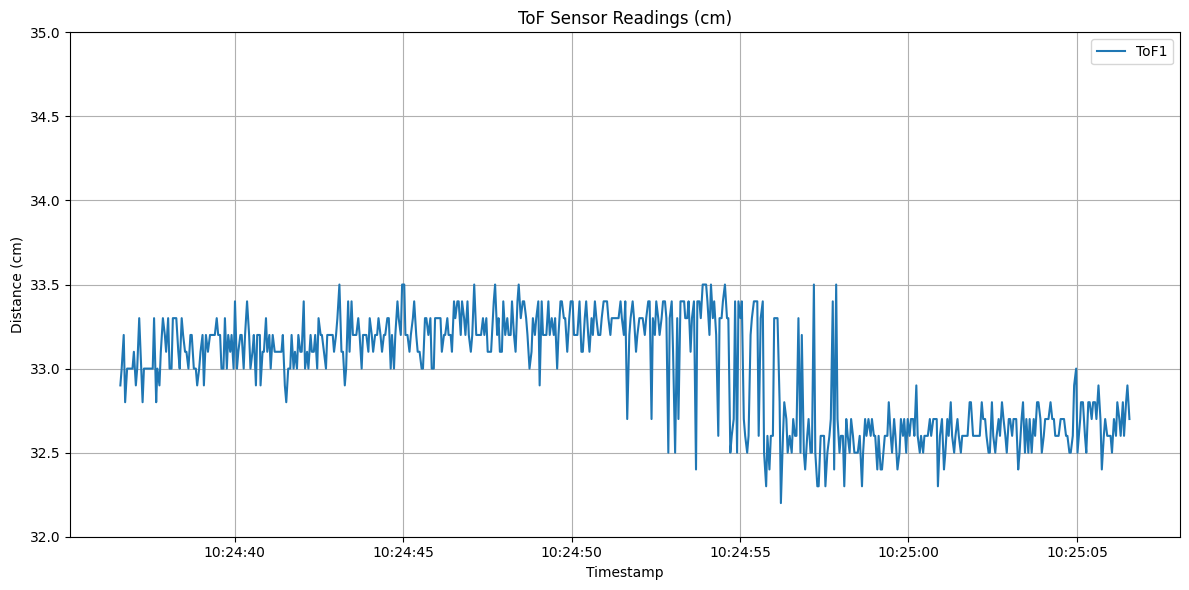

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("abnormal_tof_30.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert ToF values from mm to cm
for col in ['tof1']:
    df[col] = df[col] / 10.0

# Plot ToF1 (in cm) with the specified y-axis range
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['tof1'], label='ToF1')
plt.xlabel('Timestamp')
plt.ylabel('Distance (cm)')
plt.title('ToF Sensor Readings (cm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(32, 35) # Set y-axis from 20 to 40 cm
plt.show()

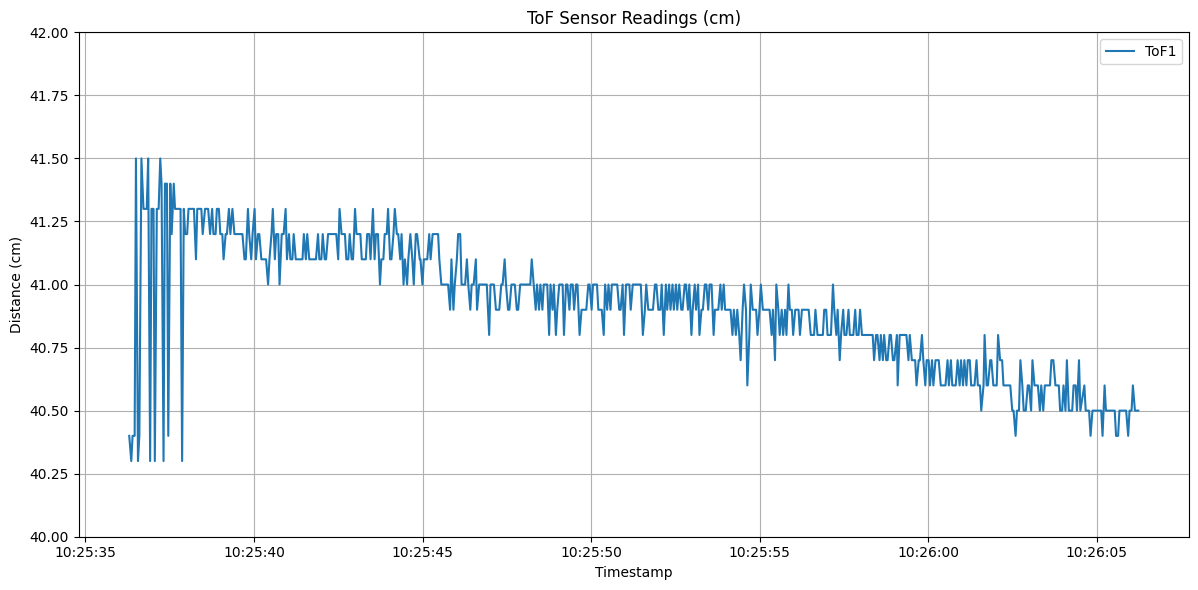

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("abnormal_tof_40.csv")

# แปลง timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# แปลงค่า ToF จาก mm เป็น cm
for col in ['tof1']:
    df[col] = df[col] / 10.0

# Plot กราฟ ToF ทั้ง 4 ตัว (หน่วย cm)
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['tof1'], label='ToF1')
plt.xlabel('Timestamp')
plt.ylabel('Distance (cm)')
plt.title('ToF Sensor Readings (cm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(40, 42)
plt.show()

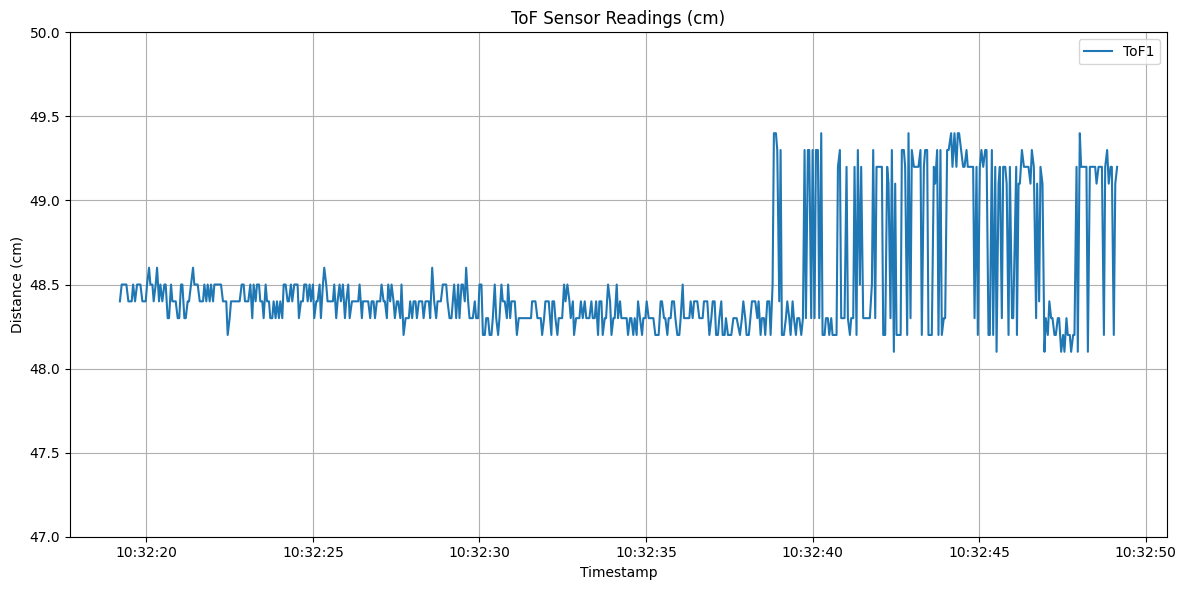

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("abnormal_tof_50.csv")

# แปลง timestamp เป็น datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# แปลงค่า ToF จาก mm เป็น cm
for col in ['tof1']:
    df[col] = df[col] / 10.0

# Plot กราฟ ToF ทั้ง 4 ตัว (หน่วย cm)
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['tof1'], label='ToF1')
plt.xlabel('Timestamp')
plt.ylabel('Distance (cm)')
plt.title('ToF Sensor Readings (cm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(47, 50)
plt.show()

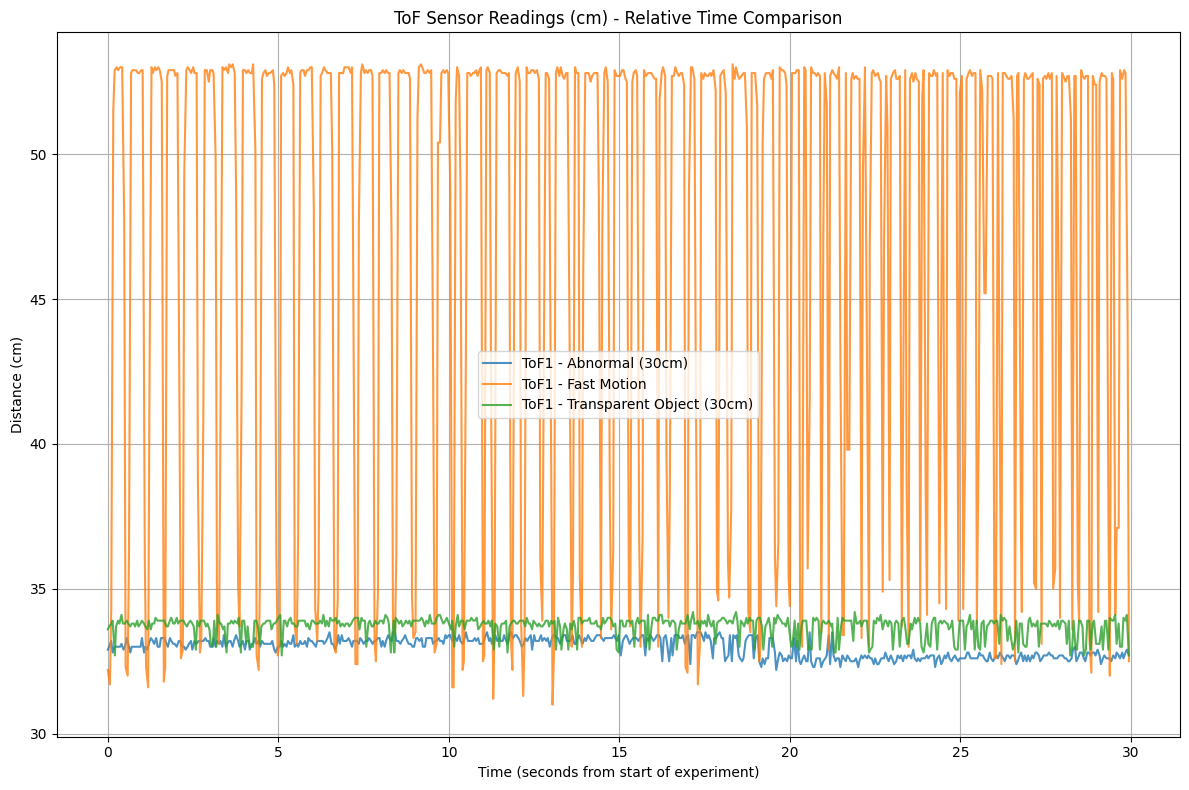

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define file names and their corresponding labels for the plot
file_names = {
    "abnormal_tof_30.csv": "Abnormal (30cm)",
    "fast_motion_tof.csv": "Fast Motion",
    "transparent_tof_30.csv": "Transparent Object (30cm)"
}

all_data = []

for file_name, label in file_names.items():
    try:
        df = pd.read_csv(file_name)

        # Convert 'timestamp' column to datetime objects
        # 'errors='coerce'' will turn invalid parsing into NaT (Not a Time)
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        # Drop rows where timestamp conversion failed
        df.dropna(subset=['timestamp'], inplace=True)

        if not df.empty:
            # Calculate Relative Time: Set the start time of each experiment to 0 seconds
            df['relative_time'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()
            
            # Convert tof1 from millimeters (mm) to centimeters (cm)
            # Assuming tof1 values in the CSV are originally in millimeters.
            # If they are already in cm, you can remove this line.
            df['tof1_cm'] = df['tof1'] / 10.0 
            
            df['Experiment'] = label
            # Select relevant columns: relative_time, converted tof1_cm, and Experiment label
            df_selected = df[['relative_time', 'tof1_cm', 'Experiment']].copy()
            all_data.append(df_selected)
        else:
            print(f"File {file_name} is empty or has no valid timestamps after processing.")

    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except KeyError as e:
        print(f"Missing expected column in {file_name}: {e}")
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

if not all_data:
    print("No data loaded. Cannot create plot.")
else:
    # Concatenate all processed DataFrames into a single DataFrame
    combined_df = pd.concat(all_data)

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Plot each experiment's data separately to ensure distinct legends
    for label in combined_df['Experiment'].unique():
        subset = combined_df[combined_df['Experiment'] == label]
        # Plotting 'tof1_cm' (converted to centimeters)
        plt.plot(subset['relative_time'], subset['tof1_cm'], label=f'ToF1 - {label}', alpha=0.8) 

    plt.title('ToF Sensor Readings (cm) - Relative Time Comparison')
    plt.xlabel('Time (seconds from start of experiment)')
    plt.ylabel('Distance (cm)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout() # Adjust plot layout to prevent labels from overlapping
    plt.show()